# **Load Libraries**

In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

# **How does Genetic Algorithm Work?**

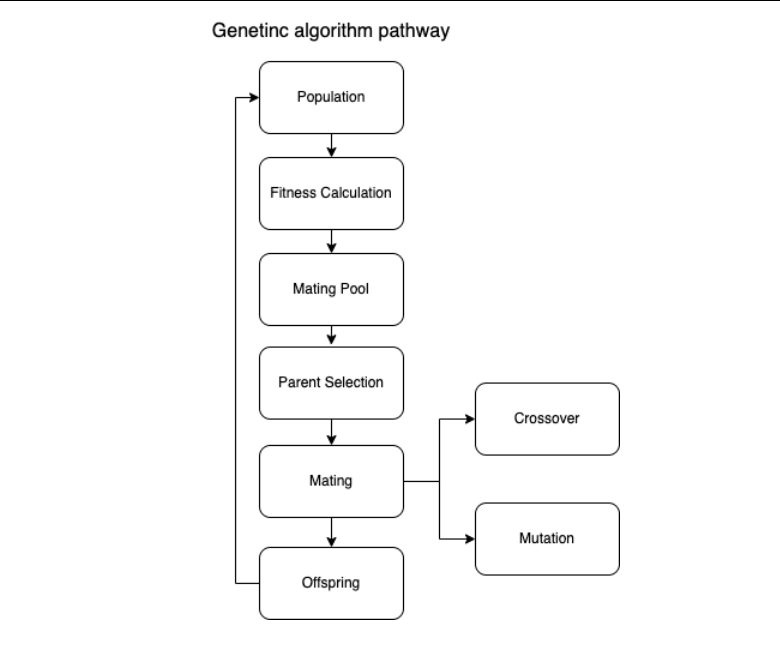

In [3]:
# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = "SPHERE!"

class Individual(object):
	'''
	Class representing individual in population
	'''
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		'''
		create random genes for mutation
		'''
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		'''
		create chromosome or string of genes
		'''
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		'''
		Perform mating and produce new offspring
		'''

		# chromosome for offspring
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			# random probability
			prob = random.random()

			# if prob is less than 0.45, insert gene
			# from parent 1
			if prob < 0.45:
				child_chromosome.append(gp1)

			# if prob is between 0.45 and 0.90, insert
			# gene from parent 2
			elif prob < 0.90:
				child_chromosome.append(gp2)

			# otherwise insert random gene(mutate),
			# for maintaining diversity
			else:
				child_chromosome.append(self.mutated_genes())

		# create new Individual(offspring) using
		# generated chromosome for offspring
		return Individual(child_chromosome)

	def cal_fitness(self):
		'''
		Calculate fitness score, it is the number of
		characters in string which differ from target
		string.
		'''
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs != gt: fitness+= 1
		return fitness

# Driver code
def main():
	global POPULATION_SIZE

	#current generation
	generation = 1

	found = False
	population = []

	# create initial population
	for _ in range(POPULATION_SIZE):
				gnome = Individual.create_gnome()
				population.append(Individual(gnome))

	while not found:

		# sort the population in increasing order of fitness score
		population = sorted(population, key = lambda x:x.fitness)

		# if the individual having lowest fitness score ie.
		# 0 then we know that we have reached to the target
		# and break the loop
		if population[0].fitness <= 0:
			found = True
			break

		# Otherwise generate new offsprings for new generation
		new_generation = []

		# Perform Elitism, that mean 10% of fittest population
		# goes to the next generation
		s = int((10*POPULATION_SIZE)/100)
		new_generation.extend(population[:s])

		# From 50% of fittest population, Individuals
		# will mate to produce offspring
		s = int((90*POPULATION_SIZE)/100)
		for _ in range(s):
			parent1 = random.choice(population[:50])
			parent2 = random.choice(population[:50])
			child = parent1.mate(parent2)
			new_generation.append(child)

		population = new_generation

		print("Generation: {}\tString: {}\tFitness: {}".\
			format(generation,
			"".join(population[0].chromosome),
			population[0].fitness))

		generation += 1


	print("Generation: {}\tString: {}\tFitness: {}".\
		format(generation,
		"".join(population[0].chromosome),
		population[0].fitness))

if __name__ == '__main__':
	main()

Generation: 1	String: kzHLg!d	Fitness: 6
Generation: 2	String: wP,vHEy	Fitness: 5
Generation: 3	String: SPH?e!Z	Fitness: 4
Generation: 4	String: SPH?e!Z	Fitness: 4
Generation: 5	String: SPH?e!Z	Fitness: 4
Generation: 6	String: Z]HERG!	Fitness: 3
Generation: 7	String: SPHPREf	Fitness: 2
Generation: 8	String: SPHPREf	Fitness: 2
Generation: 9	String: SgHERE!	Fitness: 1
Generation: 10	String: SPHERE!	Fitness: 0



# **Let's optimize Rosenbrock function.**

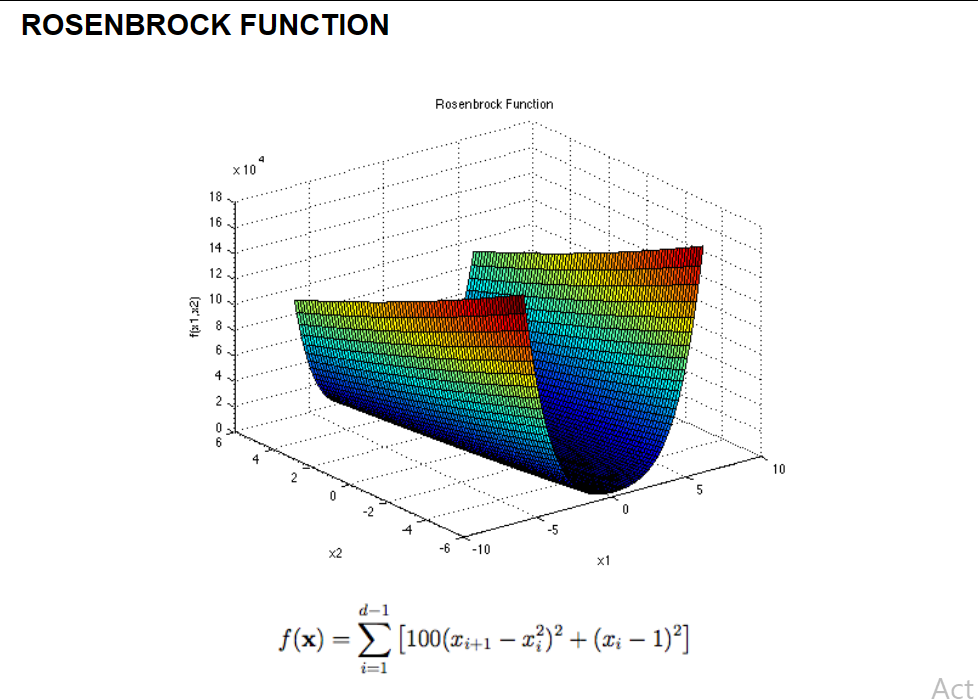

## Define the RosenBrock function

In [4]:
# cost function
def rosenbrock(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

# **Parent selection techniques**

# **1) Roulette wheel selection:**

In [5]:
def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p) * np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]

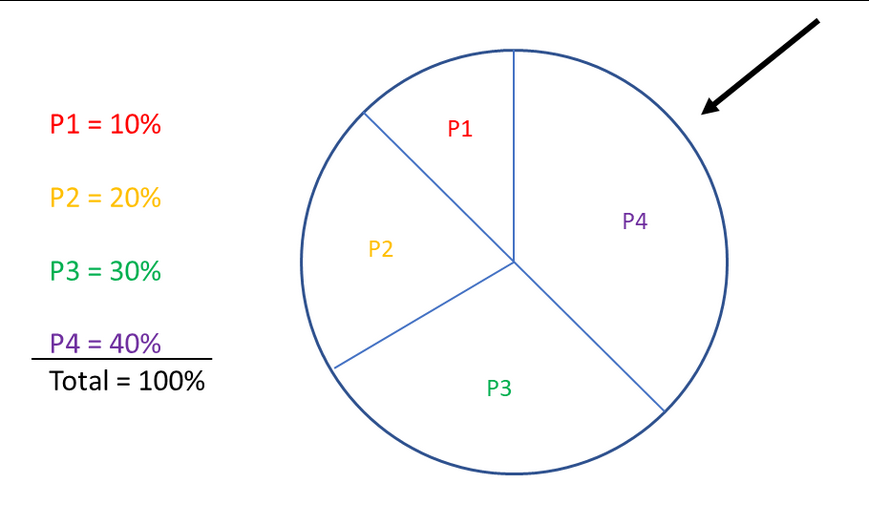

# **2) Tournment selection:**

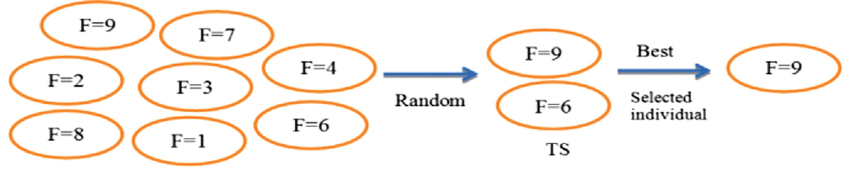

In [6]:
def tournament_selection(population, k):
    indices = np.random.choice(len(population), k, replace=False)
    return min(indices, key=lambda i: population[i]['cost'])

# **Recombination techniques**

# **1) Uniform Crossover**

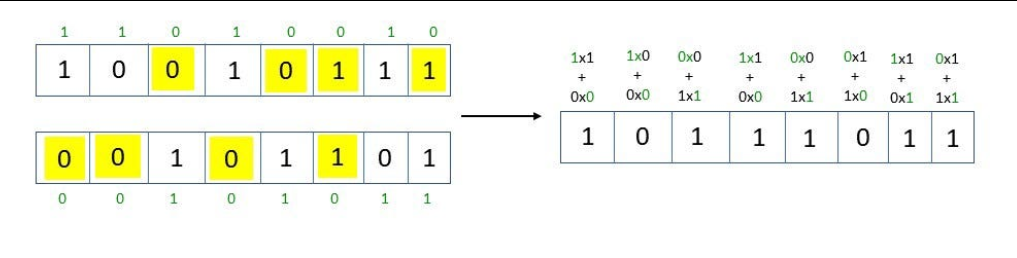

In [7]:
def uniform_crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    alpha = np.random.uniform(0, 1, c1['position'].shape)
    c1['position'] = alpha * p1['position'] + (1 - alpha) * p2['position']
    c2['position'] = alpha * p2['position'] + (1 - alpha) * p1['position']
    return c1, c2

# **2) Single-point crossover**

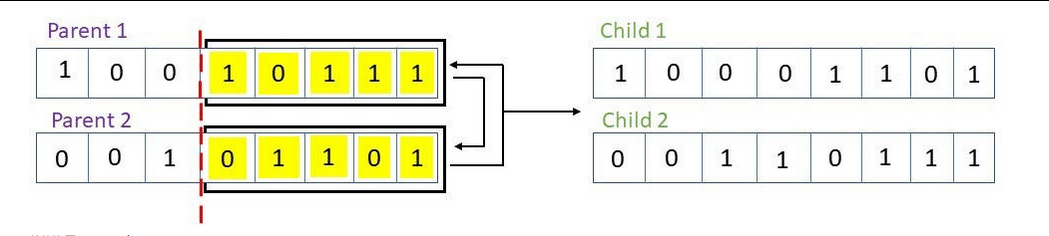

In [8]:
def single_point_crossover(p1, p2):
    c1 = copy.deepcopy(p1)
    c2 = copy.deepcopy(p2)
    point = np.random.randint(1, len(c1['position']) - 1)
    c1['position'][:point] = p1['position'][:point]
    c1['position'][point:] = p2['position'][point:]
    c2['position'][:point] = p2['position'][:point]
    c2['position'][point:] = p1['position'][point:]
    return c1, c2

# **Mutation techniques**

# **1) Gaussian mutation**

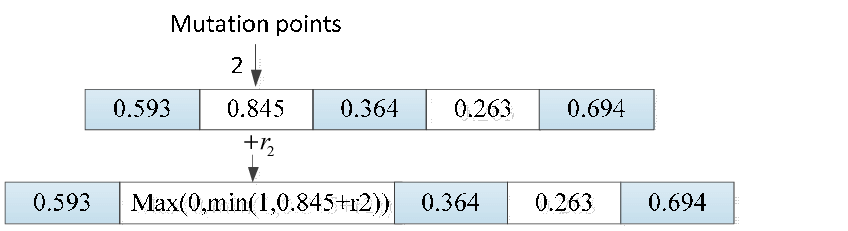

In [9]:
def gaussian_mutation(c, mu, sigma):
    y = copy.deepcopy(c)
    flag = np.random.rand(*c['position'].shape) <= mu
    ind = np.argwhere(flag)
    y['position'][ind] += sigma * np.random.randn(*ind.shape)
    return y

# **2) Uniform Mutation**

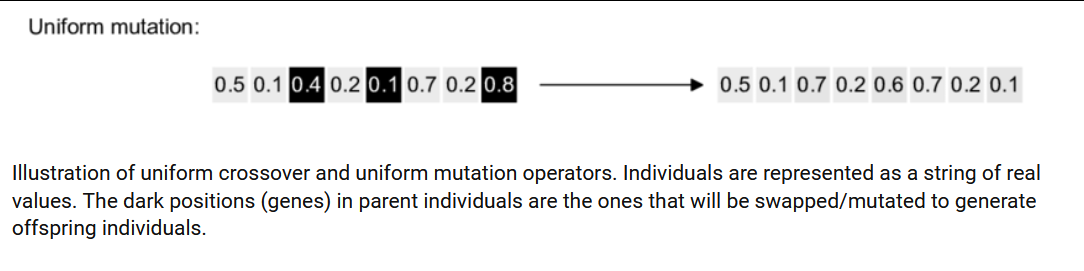

In [10]:
def uniform_mutation(c, mu, sigma):
    y = copy.deepcopy(c)
    for i in range(len(c['position'])):
        if np.random.rand() <= mu:
            y['position'][i] += sigma * np.random.randn()
    return y

# **Bounds function**

In [11]:
def bounds(c, varmin, varmax):
    c['position'] = np.maximum(c['position'], varmin)
    c['position'] = np.minimum(c['position'], varmax)
    return c['position']

# **Sorting function**

In [12]:
def sort(arr):
    n = len(arr)
    for i in range(n - 1):
        for j in range(0, n - i - 1):
            if arr[j]['cost'] > arr[j + 1]['cost']:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# **Representation : Real-Valued Representation**

# 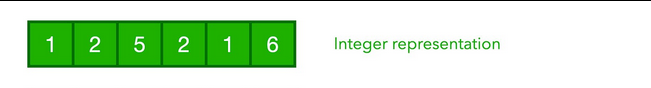

In [13]:
def real_valued_representation(num_var, varmin, varmax, npop):
    population = [{'position': np.random.uniform(varmin, varmax, num_var), 'cost': None} for _ in range(npop)]
    return population

# **RUN GA**

In [20]:
num_children = 40
tournament_size = 5
verbose = 100 
def ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, tournament_size, verbose, parent_selection, crossover, mutation):
    population = real_valued_representation(num_var, varmin, varmax, npop)

    for ind in population:
        ind['cost'] = costfunc(ind['position'])

    bestsol = min(population, key=lambda x: x['cost'])
    bestcost = np.empty(maxit)

    for it in range(maxit):
        offsprings = []
        for _ in range(num_children // 2):
            if parent_selection == "RouletteWheel":
                p1 = population[roulette_wheel_selection([ind['cost'] for ind in population])]
                p2 = population[roulette_wheel_selection([ind['cost'] for ind in population])]
            elif parent_selection == "Tournament":
                p1 = population[tournament_selection(population, tournament_size)]
                p2 = population[tournament_selection(population, tournament_size)]

            if crossover == "Uniform":
                c1, c2 = uniform_crossover(p1, p2)
            elif crossover == "SinglePoint":
                c1, c2 = single_point_crossover(p1, p2)

            if mutation == "Gaussian":
                c1 = gaussian_mutation(c1, mu, sigma)
                c2 = gaussian_mutation(c2, mu, sigma)
            elif mutation == "Uniform":
                c1 = uniform_mutation(c1, mu, sigma)

            c1['position'] = bounds(c1, varmin, varmax)
            c2['position'] = bounds(c2, varmin, varmax)

            c1['cost'] = costfunc(c1['position'])
            c2['cost'] = costfunc(c2['position'])

            offsprings.extend([c1, c2])

        population.extend(offsprings)
        population = sort(population)
        population = population[:npop]

        if c1['cost'] < bestsol['cost']:
            bestsol = copy.deepcopy(c1)
        if c2['cost'] < bestsol['cost']:
            bestsol = copy.deepcopy(c2)

        population.append(c1)
        population.append(c2)

        for ind in population:
            if ind['cost'] is None:
                ind['cost'] = costfunc(ind['position'])

        population = [ind for ind in population if ind['cost'] is not None]
        population = sorted(population, key=lambda x: x['cost'])[:npop]

        bestcost[it] = bestsol['cost']

        if verbose and it % verbose == 0:
            print('Iteration {}: Best Cost = {}'.format(it, bestcost[it]))

    return population, bestsol, bestcost

In [ ]:
# GUI
app = tk.Tk()
app.title("Genetic Algorithm for Rosenbrock Function")

def run_genetic_algorithm():
    # Fetch user inputs
    num_var = int(entry_num_var.get())
    varmin = float(entry_varmin.get())
    varmax = float(entry_varmax.get())
    maxit = int(entry_maxit.get())
    npop = int(entry_npop.get())
    mu = float(entry_mu.get())
    sigma = float(entry_sigma.get())
    parent_selection = combo_parent_selection.get()
    crossover = combo_crossover.get()
    mutation = combo_mutation.get()

    # Run the Genetic Algorithm
    out = ga(rosenbrock, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, tournament_size, verbose,
             parent_selection=parent_selection, crossover=crossover, mutation=mutation)

    # Plot the results
    plot_results(out[2])

def plot_results(bestcost):
    fig = Figure(figsize=(5, 4), dpi=100)
    plot = fig.add_subplot(1, 1, 1)
    plot.plot(bestcost)
    plot.set_xlabel('Generations')
    plot.set_ylabel('Best Cost')
    plot.set_title('Genetic Algorithm')
    plot.grid(True)

    canvas = FigureCanvasTkAgg(fig, master=app)
    canvas.draw()
    canvas.get_tk_widget().grid(row=12, columnspan=4)

# Add widgets for user input
# Number of variables
label_num_var = ttk.Label(app, text="Number of Variables:")
label_num_var.grid(row=0, column=0)
entry_num_var = ttk.Entry(app)
entry_num_var.grid(row=0, column=1)

# Variable minimum
label_varmin = ttk.Label(app, text="Variable Min:")
label_varmin.grid(row=1, column=0)
entry_varmin = ttk.Entry(app)
entry_varmin.grid(row=1, column=1)

# Variable maximum
label_varmax = ttk.Label(app, text="Variable Max:")
label_varmax.grid(row=2, column=0)
entry_varmax = ttk.Entry(app)
entry_varmax.grid(row=2, column=1)

# Maximum iterations
label_maxit = ttk.Label(app, text="Max Iterations:")
label_maxit.grid(row=3, column=0)
entry_maxit = ttk.Entry(app)
entry_maxit.grid(row=3, column=1)

# Population size
label_npop = ttk.Label(app, text="Population Size:")
label_npop.grid(row=4, column=0)
entry_npop = ttk.Entry(app)
entry_npop.grid(row=4, column=1)

# Mutation rate (mu)
label_mu = ttk.Label(app, text="Mutation Rate (mu):")
label_mu.grid(row=5, column=0)
entry_mu = ttk.Entry(app)
entry_mu.grid(row=5, column=1)

# Mutation standard deviation (sigma)
label_sigma = ttk.Label(app, text="Mutation Std Dev (sigma):")
label_sigma.grid(row=6, column=0)
entry_sigma = ttk.Entry(app)
entry_sigma.grid(row=6, column=1)

# Parent selection method
label_parent_selection = ttk.Label(app, text="Parent Selection:")
label_parent_selection.grid(row=7, column=0)
combo_parent_selection = ttk.Combobox(app, values=["RouletteWheel", "Tournament"])
combo_parent_selection.grid(row=7, column=1)
combo_parent_selection.current(0)

# Crossover method
label_crossover = ttk.Label(app, text="Crossover:")
label_crossover.grid(row=8, column=0)
combo_crossover = ttk.Combobox(app, values=["Uniform", "SinglePoint"])
combo_crossover.grid(row=8, column=1)
combo_crossover.current(0)

# Mutation method
label_mutation = ttk.Label(app, text="Mutation:")
label_mutation.grid(row=9, column=0)
combo_mutation = ttk.Combobox(app, values=["Gaussian", "Uniform"])
combo_mutation.grid(row=9, column=1)
combo_mutation.current(0)

# Run button
btn_run = ttk.Button(app, text="Run Genetic Algorithm", command=run_genetic_algorithm)
btn_run.grid(row=10, columnspan=2, pady=10)

# Main loop
app.mainloop()

Iteration 0: Best Cost = 670.3140264996727
Iteration 100: Best Cost = 4.204583570151301
Iteration 200: Best Cost = 4.202249538788148
Iteration 300: Best Cost = 4.196298093264125
Iteration 400: Best Cost = 4.193526567695121
